---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 2: Introducción a la modelación numérica </font>**
### **<font color="DodgerBlue"> Notebook 1: Diferencias finitas y solución de ODEs </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---



Una ecuación diferencial es una ecuación que involucra una función desconocida y una o más de sus derivadas. Estas ecuaciones describen relaciones entre una función y sus derivadas en una o más variables independientes. Las ecuaciones diferenciales se utilizan ampliamente en física, ingeniería, ciencias de la computación, economía y otras disciplinas para modelar fenómenos naturales y procesos dinámicos.

Existen dos tipos principales de ecuaciones diferenciales:

1. **Ecuaciones Diferenciales Ordinarias (ODEs)**: Estas ecuaciones involucran una función desconocida de una variable independiente. Es una ecuación que involucra la derivada de una función que es la queremos encontrar y que sólo tiene una variable independiente. 

    Por ejemplo, $ \frac{{dy}}{{dx}} = f(x) $ es una ecuación diferencial ordinaria, donde $y$ es la función desconocida de $x$.  Resolver esta ecuación, en este contexto, quiere decir encontrar todas las funciones posibles que satisfagan la ecuación diferencial. 
    
    Un método para resolver esta ecuación es el método de separación de variables que consiste en separar los términos de $y$ y $x$ a ambos lados de la ecuación. 
    
2. **Ecuaciones en Derivadas Parciales (PDEs)**: Estas ecuaciones involucran una función desconocida de varias variables independientes y sus derivadas parciales. Por ejemplo, la ecuación de difusión $ \frac{{\partial u}}{{\partial t}} = D \frac{{\partial^2 u}}{{\partial x^2}} $ es una ecuación en derivadas parciales, donde $u(x, t)$ es la función desconocida.

Los métodos numéricos se utilizan para resolver ecuaciones diferenciales cuando no es posible encontrar una solución analítica (es decir, una expresión algebraica que representa la solución exacta). Esto puede deberse a la complejidad de la ecuación, la falta de métodos analíticos disponibles o la necesidad de encontrar soluciones en casos generales o específicos.

Modelos famosos como el _modelo depredador-presa_ y el _modelo de clima de Lorenz_ son algunos ejemplos de modelos con ecuaciones diferenciales que fueron cruciales en nuestra comprensión de fenómenos estudiados por los científicos de la Tierra. En este contexto, los métodos numéricos son esenciales para resolver ecuaciones diferenciales que gobiernan estos procesos complejos, permitiendo a los científicos simular y predecir el comportamiento de la Tierra y sus sistemas ambientales en diferentes escalas espaciales y temporales. Estas simulaciones numéricas proporcionan información crucial para abordar desafíos ambientales, como el cambio climático, la gestión de recursos naturales y la mitigación de riesgos naturales, lo que contribuye a una comprensión más profunda y holística de nuestro planeta y su entorno dinámico.

Algunas razones por las que se utilizan métodos numéricos para resolver ecuaciones diferenciales incluyen:

1. **Flexibilidad**: Los métodos numéricos pueden adaptarse para resolver una amplia variedad de ecuaciones diferenciales, incluidas aquellas para las cuales no existen soluciones analíticas conocidas.

2. **Eficiencia computacional**: Algoritmos numéricos eficientes pueden calcular soluciones aproximadas en un tiempo razonable, incluso para problemas complejos o con dimensiones altas.

3. **Precisión controlada**: La precisión de la solución numérica puede controlarse ajustando el tamaño de los pasos de integración o la precisión de la aproximación.

4. **Aplicabilidad a problemas reales**: Muchos problemas del mundo real, especialmente en ciencias de la ingeniería y la física, pueden modelarse mediante ecuaciones diferenciales. Los métodos numéricos permiten resolver estos modelos para obtener información práctica.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)

### **<font color="ForestGreen"> Qué quiere decir discretizar </font>**

Discretizar quiere convertir una ecuación, función o elemento continuo a un elemento discreto. Es decir, una función por ejemplo, puede pasar de ser continua y tener un número de elementos infinito a tener un número de elementos finito. 

En Python, todas las evaluaciones de funciones que hemos hecho hasta ahora han sido discretas sólo que no nos hemos dado cuenta. 

A través del uso de funciones como `np.arange` o `np.linspace`, hemos creado un arreglo finito de puntos en los cuáles evaluamos la función. En varios casos, ustedes mismos se han encontrado con qué los parámetros de estas funciones hacen que se vea diferentes los resultados. 

Por ejemplo, pensemos en la función $f(x)=x^4-x^2$. El proceso de discretizar esta función lo podemos visualizar así:

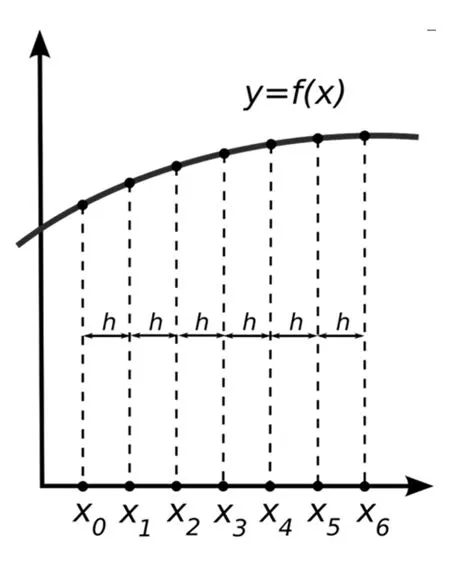

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

<font color="DarkRed"> En este ejemplo, evaluaremos la función $y(x)=x^4-x^2$. El objetivo es comparar cómo Python muestra la gráfica de esta función usando diferentes maneras de definir al vector $x$.  En particular, utilizaremos dos maneras de definir al vector $x$, una con mayor resolución ($h\leq0.1$) y otra con menor resolución ($h=1$). </font>

---

0.04040404040404041


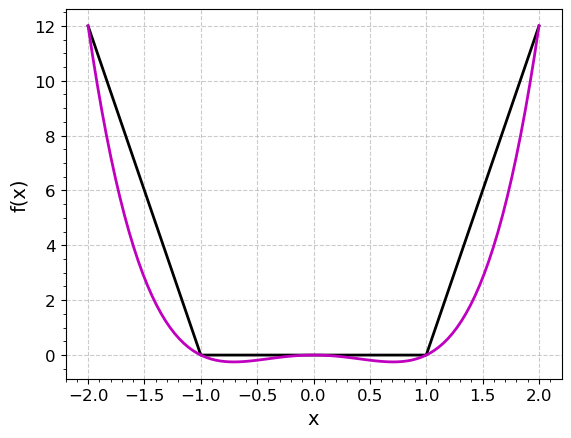

In [3]:
def f(x):
    return x**4-x**2

# hacemos dos vectores de x, de manera diferente
x_baja=np.arange(-2,3)
x_alta=np.linspace(-2,2,100)
# aqui imprimimos el resultado de np.diff que nos dice cuanto es el intervalo promedio entre cada punto de x_alta.
print(np.mean(np.diff(x_alta)))
f_baja=f(x_baja)
f_alta=f(x_alta)
plt.plot(x_baja,f_baja,c='k',linewidth=2)
plt.plot(x_alta,f_alta,c='m',linewidth=2)
lineplot_setup(-2.2,2.2,'x','f(x)',ymin=None,ymax=None,title=None)

¿Por qué es así, por que se ve de esa manera?

Vamos a agregar puntos con `plt.scatter`. 

En todo el primer tema, de hecho, las funciones que graficamos eran discretas, es decir, graficamos un número finito de puntos.

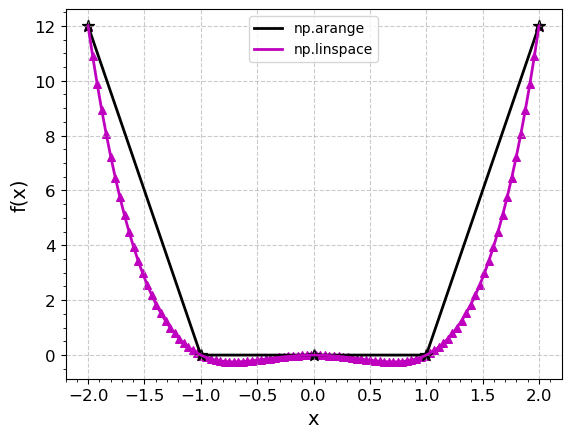

In [4]:
def f(x):
    return x**4-x**2
x_baja=np.arange(-2,3)
x_alta=np.linspace(-2,2,100)
f_baja=f(x_baja)
f_alta=f(x_alta)
plt.plot(x_baja,f_baja,c='k',linewidth=2,label='np.arange')
plt.plot(x_alta,f_alta,c='m',linewidth=2,label='np.linspace')

# graficamos cada punto que utiliza python para hacer las lineas con plt.plot
plt.scatter(x_alta,f_alta,color='m',marker='^',s=30)
plt.scatter(x_baja,f_baja,color='k',marker='*',s=80)
plt.legend()
lineplot_setup(-2.2,2.2,'x','f(x)',ymin=None,ymax=None,title=None)

La razón por la que se ven diferentes es la resolución con la que calculamos los valores de la función. En ningún caso lo hicimos de manera, en ambos lo hicimos de manera discreta pero el número de puntos es mucho menor utilizando `np.arange` (5 puntos) mientras que en `np.linspace` es de 20 veces más (100 puntos). 

Otra forma de ver esto es con el parámetro $h$ que nos dice algo sobre el salto o intervalo entre puntos en los que evaluamos la función. Lo podemos ver en la imagen anterior. 

En el caso de `np.arange`, $h=1$ mientras que en `np.linspace` es de $h=0.04$. Es decir, el paso con el que discretizamos nuestra función es muy importante. 

A este parámetro $h$ le asociamos el concepto de **resolución** que nos dice algo sobre sobre cuánto grado de aproximación hacemos a la realidad. Es una medida del salto en el espacio o tiempo con el que hacemos nuestras aproximaciones.

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1 - Discretizando </font>**

<font color="DarkBlue"> 1. Grafique la función $f(x)=sen(x)$ en el intervalo [$-\pi,\pi$] utilizando diferentes resoluciones o intervalos $h$. Utilice $h_1=0.5$, $h_2=0.05$ y $h_3=5\times10^{-4}$. 
    
<font color="DarkBlue"> 2. Haga la gráfica de alta resolución y modifique hasta el más mínimo detalle para poder contestar, ¿con cuál resolución se ve mejor la función? ¿hay diferencias observables entre los valores $h$ que utilizó? Si tuviera que escoger un valor de $h$, optimizando el costo computacional de utilizar más resolución y considerando un resultado suficientemente bueno, ¿cuál $h$ escogería?

---

### **<font color="ForestGreen">  El método de diferencias finitas </font>**


Dos conceptos clave cuando queremos resolver una ecuación diferencial con computadora son: 

- Discretización: El dominio continuo sobre el cual está definida la ecuación diferencial se discretiza en una cuadrícula de puntos. Esta cuadrícula puede ser unidimensional, bidimensional o tridimensional, dependiendo de la naturaleza del problema.

- Aproximación de Derivadas: En lugar de calcular derivadas analíticamente, los métodos de diferencias finitas aproximan las derivadas utilizando los valores de la función en los puntos vecinos de la cuadrícula. Existen diferentes esquemas de diferencias finitas para aproximar derivadas de primer orden, segundo orden y de orden superior.

Para resolver una ODE con diferencias finitas existen 3 formas principales que dependen de qué puntos utilizamos para aproximar una diferencia. 


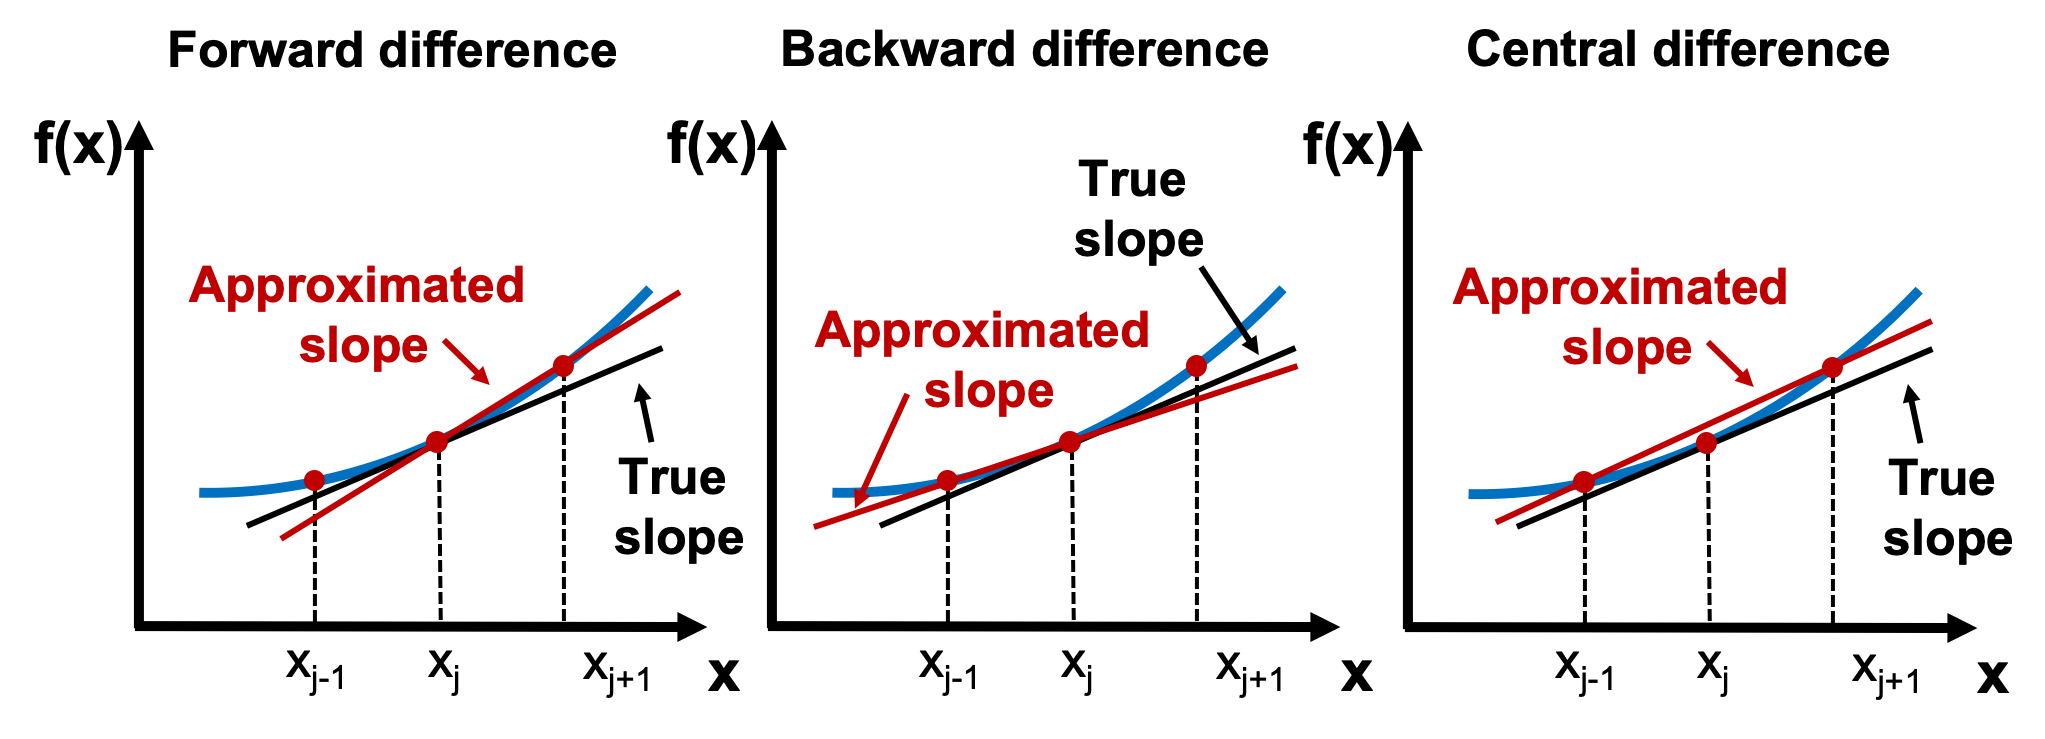

- Diferencias hacia adelante: calculamos la ecuación diferencial moviéndonos en el eje x hacia adelante en cada paso. 

\begin{align}
\frac{dy}{dx}=\frac{y_{i+1}-y_i}{h}
\end{align}

- Diferencias hacia atrás: calculamos la ecuación diferencial moviéndonos en el eje x hacia atrás en cada paso. 

\begin{align}
\frac{dy}{dx}=\frac{y_i-y_{i-1}}{h}
\end{align}

- Diferencias centradas: calculamos la ecuación diferencial moviéndonos en el eje x pero evaluando la función adelante y atrás. 

\begin{align}
\frac{dy}{dx}=\frac{y_{i+1}-y_{i-1}}{h}
\end{align}

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

<font color="DarkRed"> En el siguiente ejemplo volveremos a utilizar nuestra función $y=x^4-x^2$. El objetivo es comparar las derivadas obtenidas analíticamente con las derivadas obtenidas numéricamente. Esto es $\frac{dy}{dx}=4x^3-x^2$. Utilizaremos el método de diferencias finitas hacia adelante para la solución numérica: \begin{align}
\frac{dy}{dx}=\frac{y_{i+1}-y_i}{h}
\end{align}
utilizando una $h$ de 0.25. </font>

---

In [5]:
# definimos la resolucion, salto o intervalo de nuestra aproximacion
h=0.25
# definimos el vector x terminando en 2.01 para utilizar el valor de 2 en nuestra funcion
x=np.arange(-2,2.01,h)
def y(x):
    return x**4-x**2
def dydx(x):
    return 4*(x**3)-2*x
def dif_finit_adelante(y,x,h):
    # iniciamos la variable aproximacion y la guardamos como una lista
    aprox=[]
    for i in range(len(x)-1):
        print("i",i,"x_i",x[i])
        dydx_aprox=(y(x[i+1])-y(x[i]))/h
        aprox.append(dydx_aprox)
    return aprox
analitica=dydx(x)
numerica=dif_finit_adelante(y,x,h)

i 0 x_i -2.0
i 1 x_i -1.75
i 2 x_i -1.5
i 3 x_i -1.25
i 4 x_i -1.0
i 5 x_i -0.75
i 6 x_i -0.5
i 7 x_i -0.25
i 8 x_i 0.0
i 9 x_i 0.25
i 10 x_i 0.5
i 11 x_i 0.75
i 12 x_i 1.0
i 13 x_i 1.25
i 14 x_i 1.5
i 15 x_i 1.75


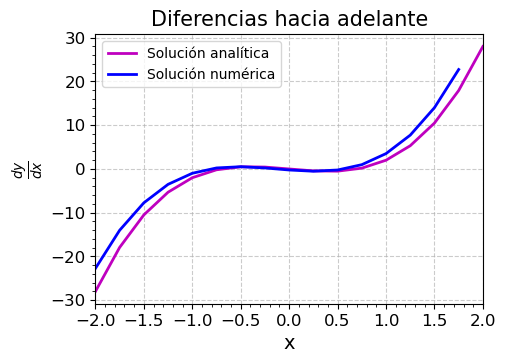

In [19]:
# graficamos nuestra solucion y comparamos la analitica con la numerica
plt.figure(figsize=(5,3.5))
plt.plot(x,analitica,label='Solución analítica',linewidth=2,c='m')
plt.plot(x[0:-1],numerica,label='Solución numérica',linewidth=2,c='b')
plt.legend()
lineplot_setup(-2,2,xlab='x',ylab=r'$\frac{dy}{dx}$',title='Diferencias hacia adelante')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 2 - Diferencias finitas </font>**

<font color="DarkBlue"> 1. Resuelve el ejemplo anterior pero utilizando un esquema numérica diferente, ya sea diferencias finitas centradas o hacia atrás. Utilice dos valores diferentes de $h$, $h_1=0.25$ y $h_2=0.05$.
    
<font color="DarkBlue"> 2. Grafique sus resultados de $\frac{dy}{dx}$ comparados con la solución analítica, indicando claramente en la leyenda las diferentes soluciones.

---

### **<font color="ForestGreen"> La ecuación hidrostática </font>**

\begin{align}
\frac{dp}{dz}=-g\rho
\end{align}

donde $p$ es la presión, $g$ es la gravedad y $\rho$ es la densidad del aire. Utilizando la ecuación del gas ideal, la densidad de la mezcla de la mezcla de gases atmosféricos típica de la Tierra se puede escribir como: 

\begin{align}
\rho_a=\frac{M_aP}{RT}
\end{align}

donde $g$ es la aceleración de la gravedad $g=9.806$ m s$^{-2}$, $M_a$ es la masa molar del aire seco igual a 28.97 g mol$^{-1}$ y R es la constante universal de los gases igual a 8.3144 J mol$^-1$ K$^{-1}$. $R_d$ es la constante de la mezcla de gases atmosférica (287 J kg$^{-1}$) igual a $R/M_a$.

Utilizando, este resultado, la ecuación diferencial del balance hidrostático se puede escribir como:
\begin{align}
\frac{dp}{dz}=-g \bigg(\frac{p}{R_dT}\bigg)
\end{align}

cuya solución para una atmósfera isotérmica, con temperatura $T_c$, en las condiciones frontera $p(z=0)=p_0$ y $p(z)=p$ es:

\begin{align}
p=p_0 e^{-\frac{zg}{R_dT_c}}
\end{align}

Primero, grafiquemos la solución analítica.



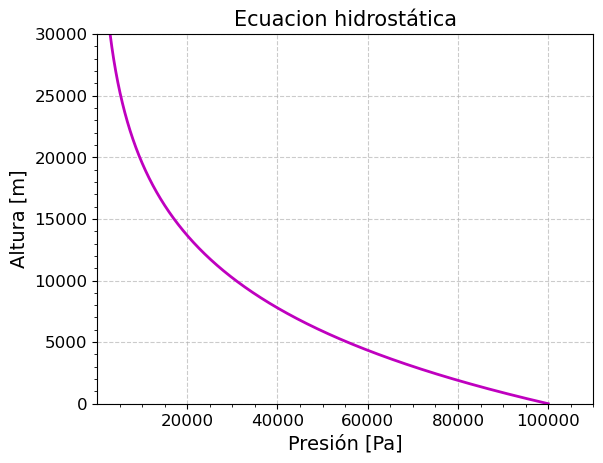

In [7]:
def exponent(z,Tc,g=9.806,R=8.3144,Ma=28.97e-3):
    Rd=R/Ma
    return -z*g/(Rd*Tc)
def p_z(z,Tc,p0):
    # funcion para la solucion analitica
    p=p0*np.exp(exponent(z,Tc))
    return p
# 1000 hPa es la presion tipica terrestre
P0=1e5 
# 290 es una temperatura tipica terrestre
Tc=290
z=np.arange(0,3e4)
# evaluamos la funcion P(z)
P=p_z(z,Tc,P0)
plt.plot(P,z,label='Solución analítica',linewidth=2,c='m')
lineplot_setup(1e2,1.1e5,ymin=0,ymax=3e4,xlab='Presión [Pa]',ylab='Altura [m]',title='Ecuacion hidrostática')

Resolviendo la ecuación hidrostática utilizando el método de diferencias finitas hacia adelante, quiere decir que cambiamos nuestra diferencial de la presión y la altura por una diferencia finita.

\begin{align}
\frac{dp}{dz}=−g\rho = \frac{p_{i+1}-p_i}{\Delta z} = \frac{p_{i+1}-p_i}{h_z}
\end{align}

donde $h_z$ es el intervalo en z con el que vamos a resolver la ecuación. Además, utilizando la ecuación para la densidad, podemos escribir todo como. 

\begin{align}
\frac{p_{i+1}-p_i}{h_z} = −g \frac{M_ap_i}{RT}
\end{align}

Primero escribimos la función para calcular la densidad:

In [8]:
def density(P,Tc,R=8.3144,Ma=28.97e-3):
    # convertimos la 
    Rd=R/Ma
    return P/(Rd*Tc)

Ahora podemos resolver nuestra ecuación pero con ciertas **condiciones frontera** porque si no, no podríamos resolverla. 
Utilizamos las mismas condiciones que en clase, para la solución analítica.

$p(z=0)=10^5$ hPa; 
$p(z=z)=p$

 y en este caso utilizaremos un $h_z=100$ m, para resolver nuestra ecuación entre 0 y 30 km. 
 
 Podemos despejar $y_{i+1}$ y obtener
 
 \begin{align}
\frac{p_{i+1}-p_i}{h_z} = −g \frac{M_ap_i}{RT} \\
p_{i+1} = p_i −h_z \times \bigg(g \frac{M_ap_i}{RT}\bigg)
\end{align}

In [20]:
# Condiciones frontera
p0 = 1e5  # Valor inicial de y
# cada cuantos metros voy a resolver la ecuacion diferencial
hs = 100
g=9.806

 # vectores de z y p donde voy a resolver la ecuaacion diferencial iterativamente
z_values = np.arange(0, 3e4, hs)
p_values = np.zeros(len(z_values))

# iniciamos la solución
p_values[0] = p0

# Esquema de diferencias finitas para ODE

for n in range(len(z_values)-1):
    p_values[n + 1] = p_values[n] + hs * (-density(p_values[n],Tc) * g)

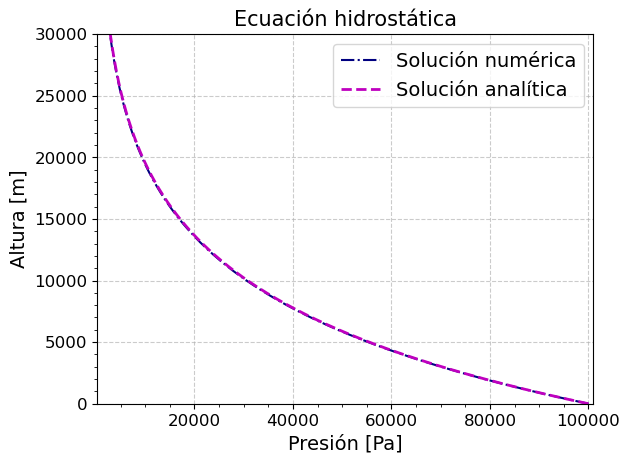

In [21]:
plt.plot(p_values,z_values,c='navy',label='Solución numérica',linestyle='-.')
plt.plot(P,z,label='Solución analítica',linewidth=2,c='m',linestyle='--')
plt.legend(fancybox=True,fontsize=14)
lineplot_setup(3e2,1.01e5,ymin=0,ymax=3e4,xlab='Presión [Pa]',ylab='Altura [m]',title='Ecuación hidrostática')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 3 - Balance hidrostático </font>**

<font color="DarkBlue"> 1. Resuelva la ecuación hidrostática pero utilizando una temperaturas diferente a la original y con una diferente resolución a la original.  
    
<font color="DarkBlue"> 2. Compare en una gráfica los 4 resultados obtenidos (2 numéricos, 2 analíticos) para las dos temperaturas. 
    
---

### **<font color="ForestGreen">  La ecuación de Clausius Clapeyron </font>**

La ecuación de Clausius-Clapeyron describe la relación entre la presión de vapor y la temperatura de una sustancia, revelando cómo cambia la presión de vapor con la temperatura en un sistema termodinámico, lo que es fundamental para comprender los procesos de cambio de fase, como la evaporación y la condensación.

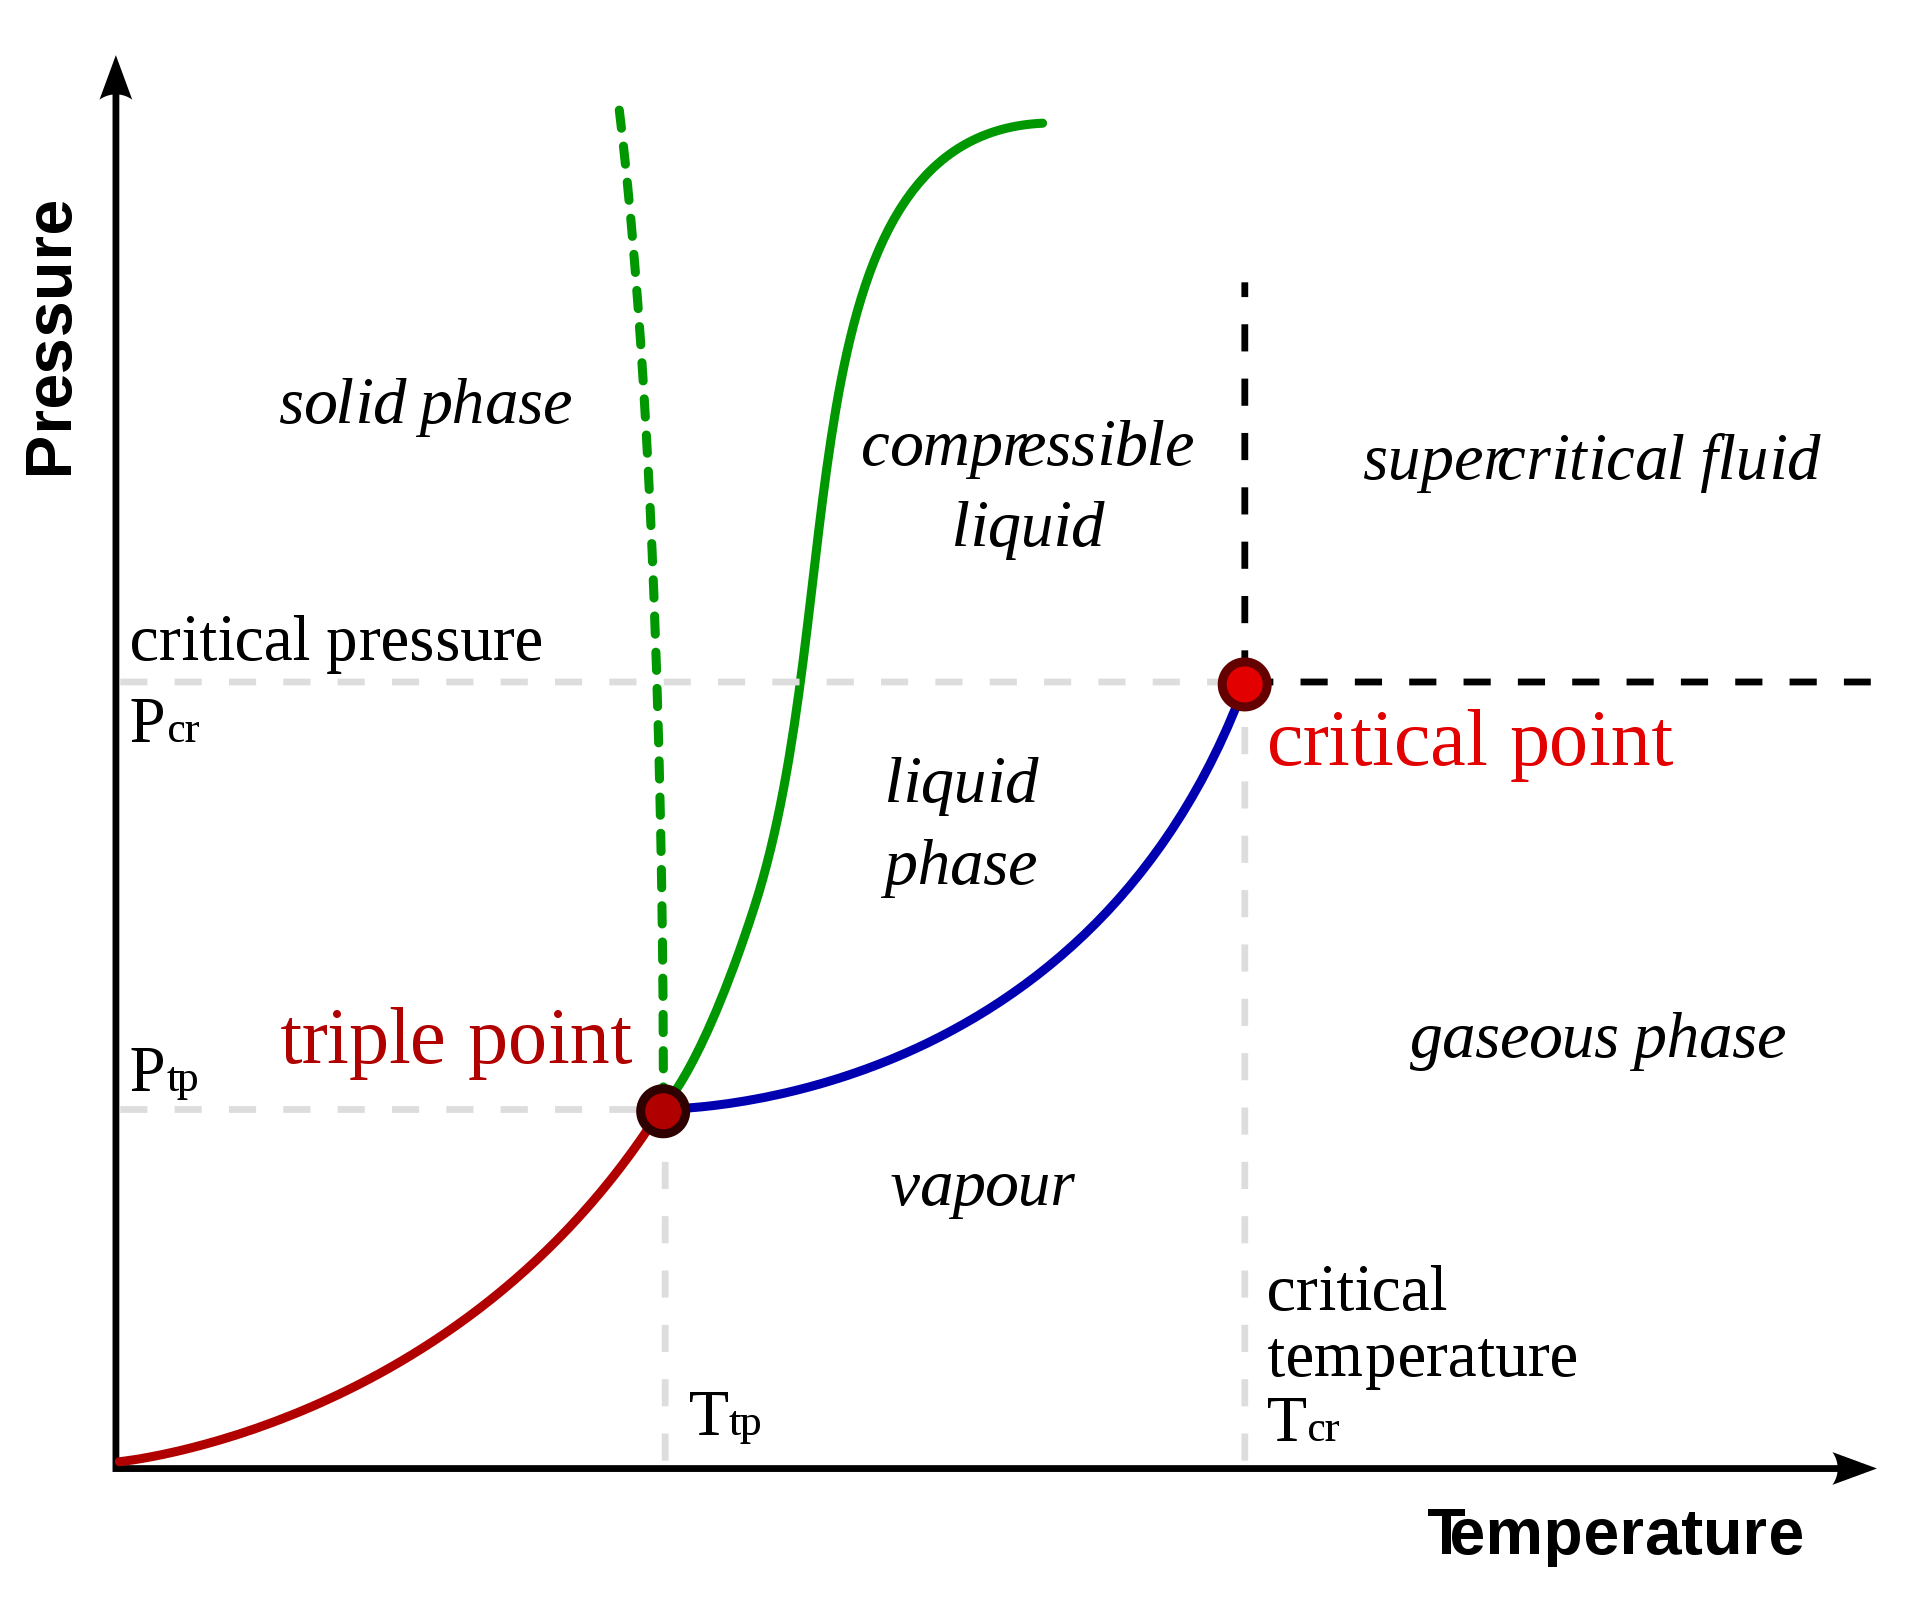

En particular trabajaremos con la siguiente versión de CC, que se utiliza mucho para la transición de fase de condensación-evaporación de un material condensable como el agua. 

\begin{align}
\frac{1}{e_s} \frac{d e_s}{dT}  = \frac{L}{R_v T^2}
\end{align}

donde T es la temperatura en $K$, $e_s$ es la presión de saturación de vapor $[Pa]$, $L$ es el calor latente de vaporización que típicamente tiene valores de 2260 kJ K$^{-1}$ y $R_v$ es la constante de los gases para la mezcla 

Podemos resolverla con las siguientes condiciones iniciales.
$e_s(T=273.15)=6.112$ hPa o 611.2 Pa.

Uno puede resolver esta ecuación para ciertas condiciones y obtener como resultado:

\begin{align}
e_s(T)=e_{s,0}e^{\frac{L}{R_v}(\frac{1}{T_0}-\frac{1}{T})}
\end{align}

donde $T_0$ es la temperatura inicial, y $e_{s,0}$ una presión de saturación de vapor. Típicamente, se usa la temperatura del punto de fusión $T_0=273.15$ K y una presión de saturación de vapor de 611 Pa.

Además, existe una aproximación muy utilizada, que no requiere de conocimiento de la condición inicial, conocida como la aproximación de [Bolton](https://journals.ametsoc.org/view/journals/mwre/108/7/1520-0493_1980_108_1046_tcoept_2_0_co_2.xml?tab_body=fulltext-display) que se puede escribir así:

\begin{align}
e_s(T)=6.112 e^{\frac{17.67T}{243.5+T}}
\end{align}

donde $T$ es la temperatura en grados Celsius y el resultado está en hPa. Las unidades son **muy importantes**.

En las siguientes dos celdas se definen la solución de Bolton y la solución analítica.

In [28]:
def bolton(T):
    # requiere T en degC
    a=611.2
    # regresa la presion de vapor en hPa
    return a*np.exp(T*17.67/(T+243.5))
bolton(0)

611.2

In [12]:
def es_analytic(es0,T0,T):
    Rv= 461.5 # J kg K-1
    L= 2.260e6
    return es0*np.exp((L/Rv)*(1/T0-1/T))

Habiendo escrito nuestras soluciones analíticas, vamos a resolver la ecuación de manera numérica. Si la escribimos con diferencias finitas hacia atrás, la ecuación de CC queda como:

\begin{align}
\frac{e_{s,i}-e_{s,i-1}}{h_T} =  \frac{L e_{s,i-1}}{R_vT^2}
\end{align}

donde $h_T$ es la resolución de la variable temperatura con la que vamos a resolver la ecuación. 

En este caso, vamos a resolver la ecuación entre 0 y 35 grados Celsius.

Primero calculamos nuestras soluciones analíticas para estos casos.

In [26]:
## condiciones iniciales, T en K y es0 en Pa.
T0=273.15
es0=611
# definimos h
dT=0.02
# vector donde vamos a resolver 
Tvec=np.arange(T0,T0+35,dT)
psat_sol=es_analytic(es0,T0,Tvec)
# pasamos la temperatura a C, porque asi lo escribio Bolton
bolton_sol=bolton(Tvec-273.15)

In [32]:
# Condiciones frontera
es0 = 611.12 # Valor inicial de es0
# cada cuantos K voy a resolver la ecuacion diferencial
dT = 0.02
Rv= 461.5 # J kg K-1
L= 2.260e6

# iniciamos los arreglos T (ahora en grados C) y es
T_values = np.arange(0, 35, dT)
es_values_back = np.zeros(len(T_values))

# iniciamos la solución
es_values_back[0] = es0

# Esquema de diferencias finitas para ODE, hacia atrás

for n in range(1,len(T_values)):
    es_values_back[n] = es_values_back[n-1] + dT * L *es_values_back[n-1]/ (Rv*((T_values[n-1]+273.15)**2))
#print(es_values)

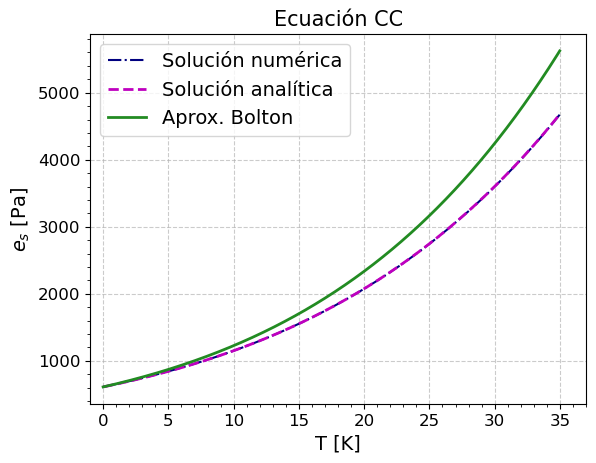

In [33]:
# Graficamos
plt.plot(T_values,es_values_back,c='navy',label='Solución numérica',linestyle='-.')
plt.plot(T_values,psat_sol,label='Solución analítica',linewidth=2,c='m',linestyle='--')
plt.plot(T_values,bolton_sol,label='Aprox. Bolton',linewidth=2,c='forestgreen',linestyle='-')
plt.legend(fancybox=True,fontsize=14)
lineplot_setup(-1,37,xlab='T [K]',ylab='$e_s$ [Pa]',title='Ecuación CC')

### ¿Por qué salió diferente la solución numérica que la de Bolton en el ejercicio?

#### ¿Ideas?

### Aprendiendo a aprender, y luego a dejar ir lo que se no puede entender

El método de Runge-Kutta es una técnica numérica utilizada para resolver ecuaciones diferenciales ordinarias (EDO) de manera aproximada. Este método es ampliamente utilizado debido a su precisión y estabilidad. Hay diferentes tipos de métodos de Runge-Kutta, siendo los más comunes el método de segundo orden (RK2), el método de cuarto orden (RK4) y el método de cuarto orden con control de paso (RK45).

Sus ecuaciones son: 

\begin{align}
y_{n+1}=y_n+ \frac{h}{6}(k_1+2k_2+2k_3+k_4)
\end{align}

donde:

$y_{n+1}$ es el valor aproximado de la solución en el siguiente paso, $h$ es el tamaño del paso, $k_1$, $k_2$, $k_3$ y $k_4$ son las pendientes calculadas en diferentes puntos del intervalo. Cada pendiente k depende de la pendiente anterior. 

En la siguiente celda se escribe una función para calcular el método de RK de 4 orden. Está documentado y comentado. 

##### ¿Puede entender el código?
##### ¿Puede utilizarlo?

In [16]:
def runge_kutta_ode_solver(f, y0, t0, t_end, h):
    """
    Resuelve una ecuación diferencia ordinaria (ODE) utilizando el método de Runge-Kutta de 4to orden.

    Parameters:
    f : function
        Una función que define la ecuacion diferencial dy/dt = f(t, y)
    y0 : float
        El valor inicial de y en el tiempo 0, o condicion inicial 0
    t0 : float
        Valor inicial de t, o la variable independiente.
    t_end : float
        Valor final de t
    h : float
        Resolución o salto de tiempo o espacio

    Returns:
    y_values : list
        Lista de soluciones en y para cada paso de tiempo.
    t_values : list
        Lista de valores de t para cada paso de tiempo.
    """

    # Iniciar las listas con los valores iniciales
    y_values = [y0]
    t_values = [t0]

    # Iniciar las condiciones iniciales en el tiempo 0
    t_current = t0
    y_current = y0

    # Iterar hasta llegar al ultimo valor de tiempo
    while t_current < t_end:
        # calcular los 4 pasos de runge Kutta, son 4 pendientes calculadas en diferentes puntos del vector t
        k1 = h * f(t_current, y_current)
        k2 = h * f(t_current + h / 2, y_current + k1 / 2)
        k3 = h * f(t_current + h / 2, y_current + k2 / 2)
        k4 = h * f(t_current + h, y_current + k3)

        # Actualizar la solucion utilizando el promedio ponderado de los 4 pasos k
        y_current += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t_current += h

        # Append - pegar los nuevos valores a la nueva lista
        y_values.append(y_current)
        t_values.append(t_current)

    return y_values, t_values

Ahora vamos a utilizarlo para resolver la ecuación diferencia de Clausius Clapeyron con el método de Runge Kutta de cuarto orden.

¿Por qué tan rápido? 

Échele dos pesos de explicación, pensaron todos. 

La realidad es que la mayor parte del código que utilicen no será suyo sino copia de otras personas. En caso de técnicas de cómputo científico, muchas veces no tendrán tiempo de entender todo el trasfondo y a menos que utilicen ese método en repetidas ocasiones, no tiene demasiado sentido pasar tanto tiempo tratando de entender códigos de los demás. Especialmente, no tiene caso eescribir 100 funciones que alguien más ya escribió y que probablemente ya fueron puestas a prueba por muchas personas. Es decir, si ya hay código funcional que nos sirve, ¿por qué no utilizarlo?

Vamos a utilizar el código de RK de 4 orden para resolver nuestra ecuación diferencial. Para esto hay que leer bien los parámetros que necesita la función y cuáles son las salidas de la función.

Además el método requiere que de una función $f$ que describa nuestra ecuación diferencial, o sea:

\begin{align}
\frac{dy}{dx}=f(x,y)
\end{align}

In [35]:
def f(T,es):
    # lado derecho de la ecuacion de CC
    result=L *es/ (Rv*((T+273.15)**2))
    return result

# Condiciones frontera
es0 = 611 # Valor inicial de y
# cada cuantos metros voy a resolver la ecuacion diferencial
dT = 0.02
T0=0
es_values,T_rk=runge_kutta_ode_solver(f, es0, T0, 35, dT)

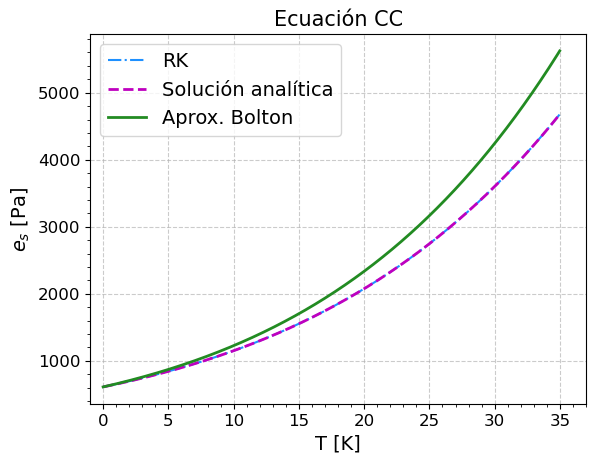

In [34]:
plt.plot(T_rk,es_values,c='dodgerblue',label='RK',linestyle='-.',linewidth=1.5)
plt.plot(T_values,psat_sol,label='Solución analítica',linewidth=2,c='m',linestyle='--')
plt.plot(T_values,bolton_sol,label='Aprox. Bolton',linewidth=2,c='forestgreen',linestyle='-')
plt.legend(fancybox=True,fontsize=14)
lineplot_setup(-1,37,xlab='T [K]',ylab='$e_s$ [Pa]',title='Ecuación CC')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 4 - RK </font>**

<font color="DarkBlue"> 1. Utilice el método de Runge-Kutta para resolver la ecuación hidrostática para una temperatura de $T_c=300 K$. 
    
<font color="DarkBlue"> 2. Compare el método de Runge-Kutta con el de diferencias finitas (usando la misma resolución). ¿Cómo puede saber cuál es mejor?
    
---